In [1]:
import cv2
import glob
from IPython.display import Video
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize
import sys
from ipywidgets import interactive, IntSlider, Layout, FloatText, IntText, RadioButtons
import os
%matplotlib inline

In [2]:
files = sorted(glob.glob('images/*.jpeg'))[::-1]
h, w = 3024, 4032

In [3]:
len(files)

27

In [37]:
Z = np.zeros((h*9, w*2*3)).astype('uint8')

E = []

k = np.ones((10, 100), np.uint8)


n = 0
for f in files:
    im = cv2.imread(f)
    gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    
    
    e = cv2.Canny(gray, 60, 300)
    e = cv2.morphologyEx(e, cv2.MORPH_CLOSE, k)
    
    
    E.append(e)
    z = np.c_[gray, e].astype('uint8')
    
    i = n % 9
    j = n // 9
    
    Z[
        i*h   : (i+1)*h, 
        j*w*2 : (j+1)*w*2
    ] = z
    sys.stdout.write('\r%d' % n)
    
    n += 1

26

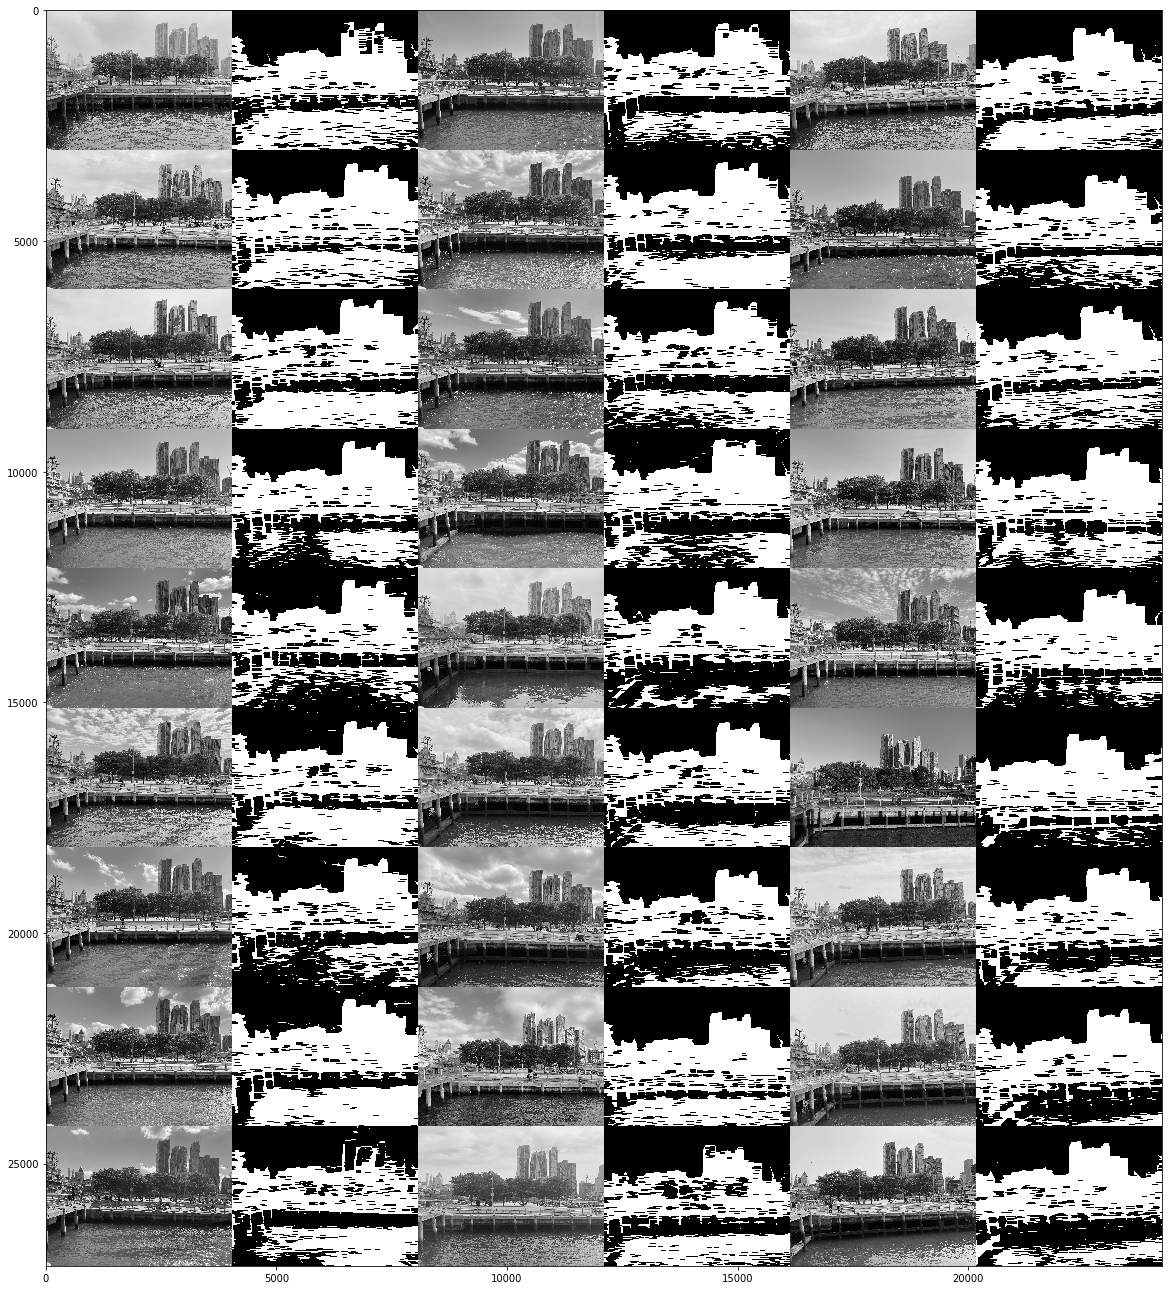

In [38]:
fig, ax = plt.subplots(figsize=(20, 30))
ax.imshow(Z, cmap='gray')
plt.show()

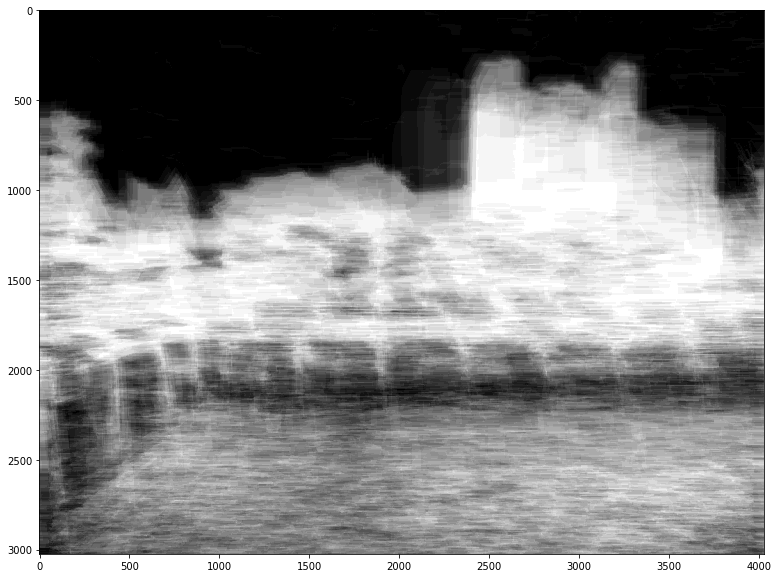

In [39]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.imshow(np.array(E).sum(0), cmap='gray')
plt.show()

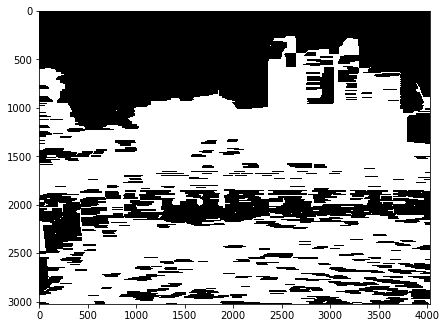

In [36]:
k = np.ones((10, 100), np.uint8)

c = cv2.morphologyEx(E[0], cv2.MORPH_CLOSE, k)

fig, ax = plt.subplots(figsize=(7, 7))
plt.imshow(c, cmap='gray')
plt.show()

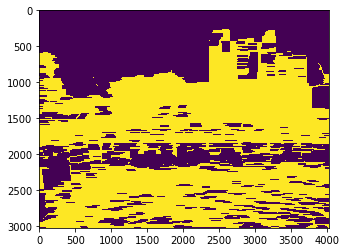

In [41]:
plt.imshow(E[0])